Quick study to investigate oscillations in reported infections in Germany. Here is the plot of the data in question: 

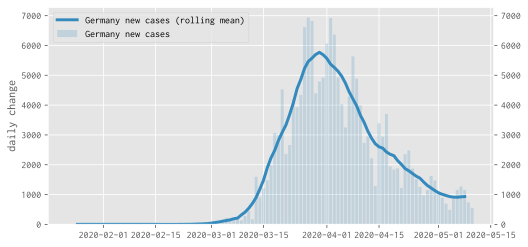

In [14]:
import coronavirus
import ipyparams
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

# get data
cases, deaths = coronavirus.get_country_data("Germany")

# plot daily changes
fig, ax = plt.subplots(figsize=(8, 4))
coronavirus.plot_daily_change(ax, cases, 'C1')

The working assumption is that during the weekend fewer numbers are captured or reported. The analysis below seems to confirm this.

We compute a discrete Fourier transform of the data, and expect a peak at a frequency corresponding to a period of 7 days.

## Data selection

We start with data from 1st March as numbers before were small. It is convenient to take a number of days that can be divided by seven (for alignment of the freuency axis in Fourier space, so we choose 63 days from 1st of March):

63

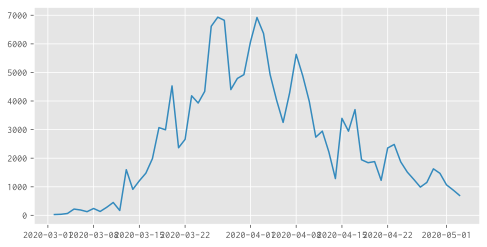

In [2]:
data = cases['2020-03-01':'2020-05-03']
# compute daily change
diff = data.diff().dropna()
# plot data points (corresponding to bars in figure above:)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(diff.index, diff, '-C1', label='daily new cases Germany')
# How many data points (=days) have we got?
diff.size

In [3]:
diff2 = diff.resample("24h").asfreq() # ensure we have one data point every day
diff2.size

63

## Compute the frequency spectrum

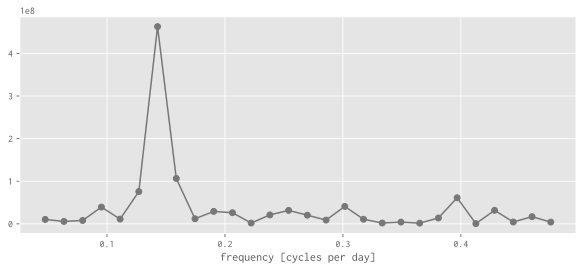

In [4]:
fig, ax = plt.subplots(figsize=(10,4))
# compute power density spectrum 
change_F = abs(np.fft.fft(diff2))**2
# determine appropriate frequencies
n = change_F.size
freq = np.fft.fftfreq(n, d=1)
# We skip values at indices 0, 1 and 2: these are large because we have a finite 
# sequence and not substracted the mean from the data set
# We also only plot the the first n/2 frequencies as for high n, we get negative
# frequencies with the same data content as the positive ones.
ax.plot(freq[3:n//2], change_F[3:n//2], 'o-C3')
ax.set_xlabel('frequency [cycles per day]');


A signal with oscillations on a weekly basis would correspond to a frequency of 1/7 as frequency is measured in `per day`. We thus expect the peak above to be at 1/7 $\approx 0.1428$. 

We can show this more easily by changing the frequency scale from cycles per day to cycles per week:


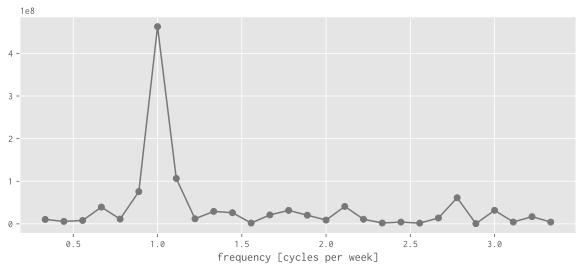

In [5]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(freq[3:n//2] * 7, change_F[3:n//2], 'o-C3')
ax.set_xlabel('frequency [cycles per week]');

In other words: there as a strong component of the data with a frequency corresponding to one week.


This is the end of the notebook.

In [15]:

coronavirus.display_binder_link(ipyparams.notebook_name)

url is https://mybinder.org/v2/gh/oscovida/oscovida.github.io/master?filepath=ipynb/


[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/oscovida.github.io/master?filepath=ipynb/)

['Javascript',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_ipython_support',
 'basename',
 'defaultdict',
 'display',
 'get_ipython',
 'notebook_name',
 'params',
 'parse_qs',
 'raw_params',
 'raw_url',
 'sleep',
 'target_func',
 'update_params',
 'urlparse']

In [13]:
ipyparams.notebook_name

''

In [8]:
coronavirus.compute_binder_link(ipyparams.notebook_name)

'https://mybinder.org/v2/gh/oscovida/oscovida.github.io/master?filepath=ipynb/'

In [9]:
https://mybinder.org/v2/gh/oscovida/oscovida.github.io/master?filepath=ipynb/

SyntaxError: invalid syntax (<ipython-input-9-81ab96dc3adf>, line 1)

# Fourier transform basics

A little playground to explore properties of discrete Fourier transforms.

In [ ]:
time = np.linspace(0, 4, 1000)
signal_frequency = 3   # choose this freely
signal = np.sin(time * 2 * np.pi * signal_frequency)
fourier = np.abs(np.fft.fft(signal))

# compute frequencies in fourier spectrum
n = signal.size
timestep = time[1] - time[0]
freqs = np.fft.fftfreq(n, d=timestep)

In [ ]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(time, signal, 'oC9', label=f'signal, frequency={signal_frequency}')
ax.set_xlabel('time')
ax.legend()
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(freqs[0:n//2][:20], fourier[0:n//2][0:20], 'o-C8', label="Fourier transform")
ax.legend()
ax.set_xlabel('frequency');
